In [105]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from csv import reader
import seaborn as sns

In [106]:
df = pd.read_csv('box2hrz-007с.csv')
df

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,gas_frac,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz
0,860542,28,0,208791.220,203940.950,349847.000,9718,6891,6,1.011170e+15,...,0.125776,0.028659,9.122520,37.872100,102.308640,0.027390,0.027437,-259.72600,-82.91320,-202.92100
1,860543,28,1,314122.000,24372.678,278202.310,14620,15249,15,5.412350e+14,...,0.112946,0.030866,5.959630,7.914490,48.730761,0.111877,0.011779,-282.64600,1.06033,-293.46200
2,860544,28,2,83855.367,206624.140,144593.690,3903,6766,4,7.260400e+14,...,0.120374,0.022724,6.144960,11.553600,59.058935,0.085323,0.063623,-40.43990,-160.57900,-72.43460
3,860545,28,3,327261.750,233165.060,209430.580,15232,5531,7,6.286450e+14,...,0.116089,0.027928,6.192280,34.833100,54.705239,0.063246,0.037204,-9.51925,251.43900,-118.92500
4,860546,28,4,183444.060,193161.880,332979.030,8538,7393,6,2.217660e+14,...,0.116187,0.026047,3.689910,2.097220,23.053572,0.216284,0.028688,870.24200,617.94800,-509.89900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,870966,28,15074,304444.090,76153.484,125475.130,14170,12839,15,7.152720e+12,...,0.044805,0.034122,0.390212,0.003211,0.299250,0.317329,0.082210,333.19500,172.07700,70.60560
10425,870967,28,15240,165232.340,66270.766,57933.605,7690,13299,13,7.388280e+12,...,0.054074,0.034059,0.387234,0.007786,0.362322,0.453900,0.090051,-99.56510,104.02400,142.64100
10426,870968,28,15272,272347.840,305951.750,303981.470,12676,2143,3,7.231790e+12,...,0.033251,0.032024,0.447326,0.001472,0.255544,0.001987,0.043893,-333.16800,-55.94300,261.41000
10427,870969,28,15289,111759.160,122749.100,339429.380,5201,10670,9,7.085930e+12,...,0.055285,0.030725,0.341775,0.007282,0.322402,0.242687,0.121855,75.08240,19.83800,-7.41744


In [107]:
df.drop(df[df.M500_msolh < 10**(13.5)].index, inplace=True)
df.drop(df[df.M500_msolh > (1*10**(15))].index, inplace=True)
#df.drop(df[df.Lx_ergs > 20].index, inplace=True)
df = df.reset_index(drop=True)
df

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,gas_frac,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz
0,860543,28,1,314122.000,24372.678,278202.3100,14620,15249,15,5.412350e+14,...,0.112946,0.030866,5.95963,7.914490,48.730761,0.111877,0.011779,-282.64600,1.06033,-293.4620
1,860544,28,2,83855.367,206624.140,144593.6900,3903,6766,4,7.260400e+14,...,0.120374,0.022724,6.14496,11.553600,59.058935,0.085323,0.063623,-40.43990,-160.57900,-72.4346
2,860545,28,3,327261.750,233165.060,209430.5800,15232,5531,7,6.286450e+14,...,0.116089,0.027928,6.19228,34.833100,54.705239,0.063246,0.037204,-9.51925,251.43900,-118.9250
3,860546,28,4,183444.060,193161.880,332979.0300,8538,7393,6,2.217660e+14,...,0.116187,0.026047,3.68991,2.097220,23.053572,0.216284,0.028688,870.24200,617.94800,-509.8990
4,860547,28,5,335807.380,215448.220,165635.8000,15630,6355,7,2.297790e+14,...,0.095331,0.031179,4.89550,1.365370,25.394430,0.562556,0.040435,-233.67700,-392.12200,-65.4531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,862981,28,2440,90735.453,79530.023,349979.1600,4223,12682,13,3.300200e+13,...,0.065329,0.030298,1.15690,0.053976,2.153622,0.203722,0.088741,-306.16800,-259.23700,-238.3570
1507,863048,28,2509,133566.840,252393.580,9162.6074,6216,4636,5,3.541540e+13,...,0.070545,0.026273,0.96024,0.087527,1.976237,0.159104,0.080344,135.81400,-320.82600,-207.7780
1508,863116,28,2577,253364.050,210631.500,54857.3090,11792,6580,6,3.538490e+13,...,0.076147,0.025487,1.05244,0.099174,2.337356,0.371641,0.092072,-268.93100,-265.55500,-101.1440
1509,863268,28,2729,209765.880,327212.190,292273.5000,9763,1153,2,3.325670e+13,...,0.077086,0.026525,1.00023,0.081538,2.202694,0.198966,0.058027,672.49200,413.61100,-191.9870


In [108]:
df['fossil'] = 'no'
df.loc[(df.M_sat_M_cD<=0.1)&(df.Lx_ergs>=0.1),'fossil']='yes'
df

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz,fossil
0,860543,28,1,314122.000,24372.678,278202.3100,14620,15249,15,5.412350e+14,...,0.030866,5.95963,7.914490,48.730761,0.111877,0.011779,-282.64600,1.06033,-293.4620,no
1,860544,28,2,83855.367,206624.140,144593.6900,3903,6766,4,7.260400e+14,...,0.022724,6.14496,11.553600,59.058935,0.085323,0.063623,-40.43990,-160.57900,-72.4346,yes
2,860545,28,3,327261.750,233165.060,209430.5800,15232,5531,7,6.286450e+14,...,0.027928,6.19228,34.833100,54.705239,0.063246,0.037204,-9.51925,251.43900,-118.9250,yes
3,860546,28,4,183444.060,193161.880,332979.0300,8538,7393,6,2.217660e+14,...,0.026047,3.68991,2.097220,23.053572,0.216284,0.028688,870.24200,617.94800,-509.8990,no
4,860547,28,5,335807.380,215448.220,165635.8000,15630,6355,7,2.297790e+14,...,0.031179,4.89550,1.365370,25.394430,0.562556,0.040435,-233.67700,-392.12200,-65.4531,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,862981,28,2440,90735.453,79530.023,349979.1600,4223,12682,13,3.300200e+13,...,0.030298,1.15690,0.053976,2.153622,0.203722,0.088741,-306.16800,-259.23700,-238.3570,no
1507,863048,28,2509,133566.840,252393.580,9162.6074,6216,4636,5,3.541540e+13,...,0.026273,0.96024,0.087527,1.976237,0.159104,0.080344,135.81400,-320.82600,-207.7780,no
1508,863116,28,2577,253364.050,210631.500,54857.3090,11792,6580,6,3.538490e+13,...,0.025487,1.05244,0.099174,2.337356,0.371641,0.092072,-268.93100,-265.55500,-101.1440,no
1509,863268,28,2729,209765.880,327212.190,292273.5000,9763,1153,2,3.325670e+13,...,0.026525,1.00023,0.081538,2.202694,0.198966,0.058027,672.49200,413.61100,-191.9870,no


In [109]:
cl = df.copy()
cl['M500_msolh'] = np.log(cl['M500_msolh'])
cl['T_kev'] = np.log(cl['T_kev'])
cl['Lx_ergs'] = np.log(cl['Lx_ergs'])
cl['Y500c'] = np.log(cl['Y500c'])

cl

,# id,snap_id,uid,x,y,z,x_pixel,y_pixel,i_sector,M500_msolh,...,star_frac,T_kev,Lx_ergs,Y500c,M_sat_M_cD,cshift,vx,vy,vz,fossil
0,860543,28,1,314122.000,24372.678,278202.3100,14620,15249,15,33.924875,...,0.030866,1.785008,2.068695,3.886310,0.111877,0.011779,-282.64600,1.06033,-293.4620,no
1,860544,28,2,83855.367,206624.140,144593.6900,3903,6766,4,34.218626,...,0.022724,1.815632,2.446997,4.078536,0.085323,0.063623,-40.43990,-160.57900,-72.4346,yes
2,860545,28,3,327261.750,233165.060,209430.5800,15232,5531,7,34.074588,...,0.027928,1.823303,3.550568,4.001959,0.063246,0.037204,-9.51925,251.43900,-118.9250,yes
3,860546,28,4,183444.060,193161.880,332979.0300,8538,7393,6,33.032644,...,0.026047,1.305602,0.740613,3.137821,0.216284,0.028688,870.24200,617.94800,-509.8990,no
4,860547,28,5,335807.380,215448.220,165635.8000,15630,6355,7,33.068139,...,0.031179,1.588316,0.311425,3.234530,0.562556,0.040435,-233.67700,-392.12200,-65.4531,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,862981,28,2440,90735.453,79530.023,349979.1600,4223,12682,13,31.127589,...,0.030298,0.145744,-2.919214,0.767151,0.203722,0.088741,-306.16800,-259.23700,-238.3570,no
1507,863048,28,2509,133566.840,252393.580,9162.6074,6216,4636,5,31.198168,...,0.026273,-0.040572,-2.435802,0.681195,0.159104,0.080344,135.81400,-320.82600,-207.7780,no
1508,863116,28,2577,253364.050,210631.500,54857.3090,11792,6580,6,31.197306,...,0.025487,0.051111,-2.310879,0.849020,0.371641,0.092072,-268.93100,-265.55500,-101.1440,no
1509,863268,28,2729,209765.880,327212.190,292273.5000,9763,1153,2,31.135277,...,0.026525,0.000230,-2.506689,0.789681,0.198966,0.058027,672.49200,413.61100,-191.9870,no


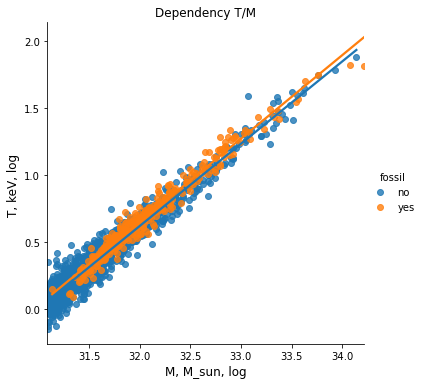

In [110]:
sns.lmplot(x = 'M500_msolh', y = 'T_kev', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('T, keV, log ', fontsize=12)
plt.title ('Dependency T/M')
plt.savefig('T-M.png')

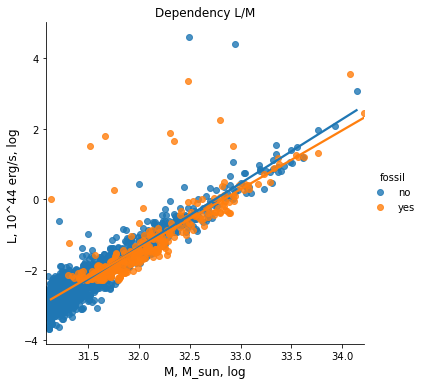

In [111]:
sns.lmplot(x = 'M500_msolh', y = 'Lx_ergs', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('L, 10^44 erg/s, log ', fontsize=12)
plt.title ('Dependency L/M')
plt.savefig('L-M.png')

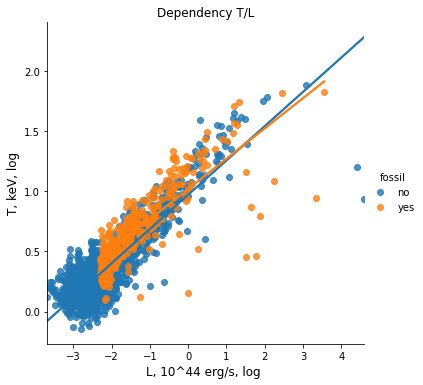

In [112]:
sns.lmplot(x = 'Lx_ergs', y = 'T_kev', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('L, 10^44 erg/s, log ',fontsize=12)
plt.ylabel('T, keV, log', fontsize=12)
plt.title ('Dependency T/L')
plt.savefig('T-L.png')

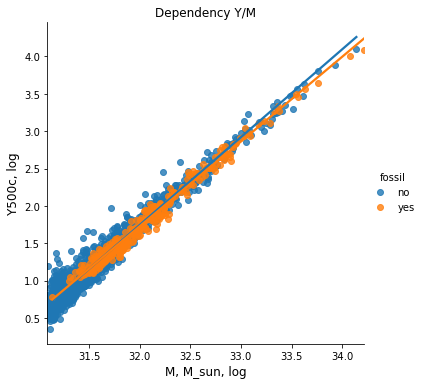

In [113]:
sns.lmplot(x = 'M500_msolh', y = 'Y500c', hue="fossil", data=cl, fit_reg=True, ci = None, legend = True)
plt.xlabel('M, M_sun, log',fontsize=12)
plt.ylabel('Y500c, log', fontsize=12)
plt.title ('Dependency Y/M')
plt.savefig('Y-M.png')

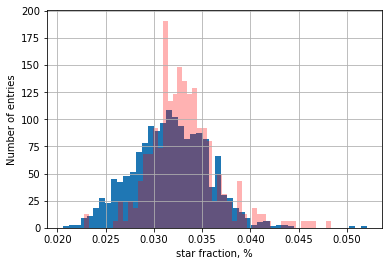

In [115]:
df.star_frac[(df.fossil=='no')].hist(bins = 50, density = True)
df.star_frac[(df.fossil=='yes')].hist(bins = 50, alpha = 0.3, color = 'red', density = True)
plt.xlabel(r'star fraction, %')
plt.ylabel(r'Number of entries')
#plt.legend(loc='best')
plt.show()

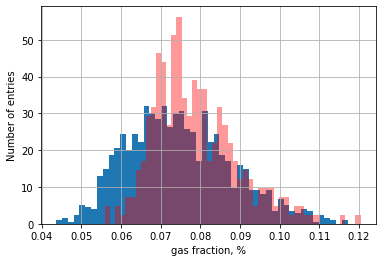

In [116]:
df.gas_frac[(df.fossil=='no')].hist(bins = 50, density = True)
df.gas_frac[(df.fossil=='yes')].hist(bins = 50, alpha = 0.4, color = 'red', density = True)
plt.xlabel(r'gas fraction, %')
plt.ylabel(r'Number of entries')
#plt.legend(loc='best')
plt.show()

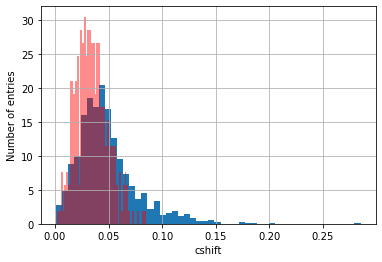

In [119]:
df.cshift[(df.fossil=='no')].hist(bins = 50, density = True)
df.cshift[(df.fossil=='yes')].hist(bins = 50, alpha = 0.45, color = 'red', density = True)
plt.xlabel(r'cshift')
plt.ylabel(r'Number of entries')
#plt.legend(loc='best')
plt.show()